# Exercises

### Imports

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('lemonade.csv')
df

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18
...,...,...,...,...,...,...,...
360,12/27/17,Wednesday,42.7,1.00,33,0.5,19
361,12/28/17,Thursday,37.8,1.25,32,0.5,16
362,12/29/17,Friday,39.5,1.25,17,0.5,15
363,12/30/17,Saturday,30.9,1.43,22,0.5,13


## Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [3]:
def get_lower_and_upper_bounds(feature, k=1.5):
    k = k
    lower_bounds = (df[feature].describe()['25%'] - (k * (df[feature].describe()['75%'] - df[feature].describe()['25%'])))
    upper_bounds = (df[feature].describe()['75%'] + (k * (df[feature].describe()['75%'] - df[feature].describe()['25%'])))
    return lower_bounds, upper_bounds

In [4]:
df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


## Using lemonade.csv dataset and focusing on continuous variables:
## - Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

In [5]:
get_lower_and_upper_bounds('Temperature')[0]

16.700000000000003

In [6]:
get_lower_and_upper_bounds('Rainfall')[0]

0.26

In [7]:
get_lower_and_upper_bounds('Flyers')[0]

4.0

In [8]:
get_lower_and_upper_bounds('Price')[0]

0.5

In [9]:
get_lower_and_upper_bounds('Sales')[0]

5.0

### Only 'temperature' appears to still have occurences below the lower bounds, 'flyers' appears a bit odd so I'd want to look into that one.

In [25]:
df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


## - Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?

In [10]:
get_lower_and_upper_bounds('Temperature')[1]

104.7

In [11]:
get_lower_and_upper_bounds('Rainfall')[1]

1.3

In [12]:
get_lower_and_upper_bounds('Flyers')[1]

76.0

In [13]:
get_lower_and_upper_bounds('Price')[1]

0.5

In [14]:
get_lower_and_upper_bounds('Sales')[1]

45.0

### All of these upper bounds with the exception of 'Sales' seem reasonable since we have limited occurences outside the threshold

In [25]:
df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


## - Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?

In [15]:
get_lower_and_upper_bounds('Temperature', k=3)[0]

-16.299999999999997

In [16]:
get_lower_and_upper_bounds('Rainfall', k=3)[0]

-0.13

In [17]:
get_lower_and_upper_bounds('Flyers', k=3)[0]

-23.0

In [18]:
get_lower_and_upper_bounds('Price', k=3)[0]

0.5

In [19]:
get_lower_and_upper_bounds('Sales', k=3)[0]

-10.0

### The only feature that appears to still have occurences outside is 'flyers', but how can we have negative flyers? Initial glance, flyers appears to be the only outliers to look at at here.

In [25]:
df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


## - Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [20]:
get_lower_and_upper_bounds('Temperature', k=3)[1]

137.7

In [21]:
get_lower_and_upper_bounds('Rainfall', k=3)[1]

1.69

In [22]:
get_lower_and_upper_bounds('Flyers', k=3)[1]

103.0

In [23]:
get_lower_and_upper_bounds('Price', k=3)[1]

0.5

In [24]:
get_lower_and_upper_bounds('Sales', k=3)[1]

60.0

### All but 'Flyers' appear viable for outlier analysis

## Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

In [34]:
num_cols = ['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales']

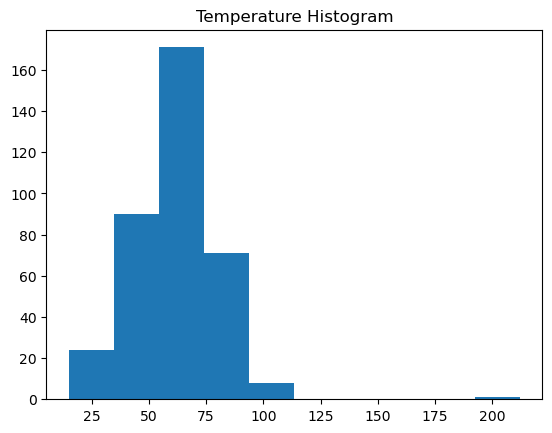

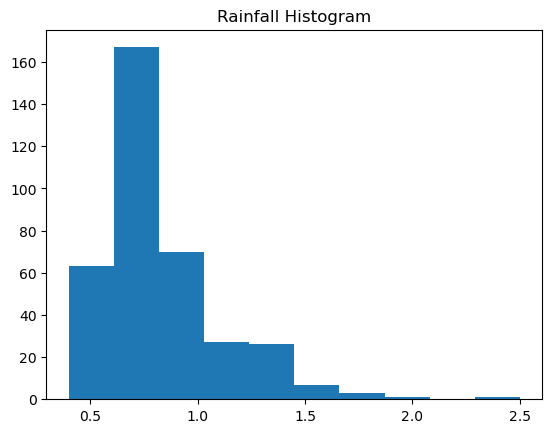

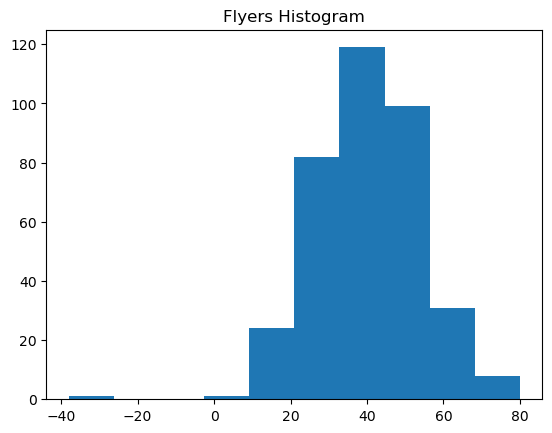

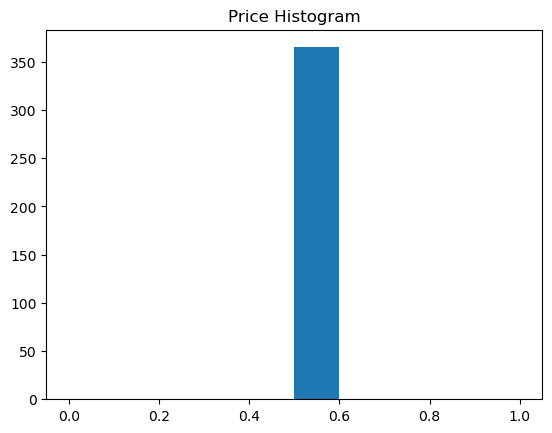

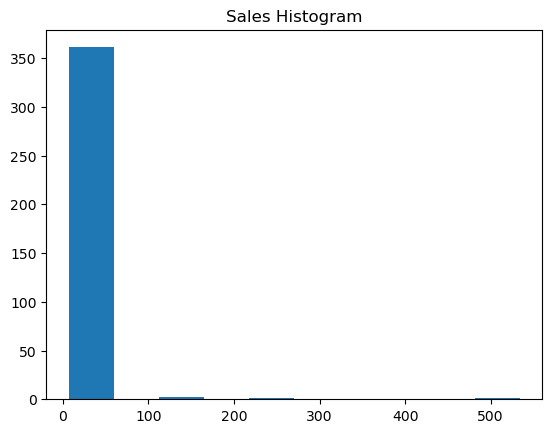

In [37]:
for col in num_cols:
    plt.hist(df[col])
    plt.title(f'{col} Histogram')
    plt.show()

## - Use a 2 sigma decision rule to isolate the outliers.
  - Do these make sense?
  - Should certain outliers be kept or removed?

In [113]:
for col in num_cols:
    z_score = (df[col] - df[col].mean()) / df[col].std()
    print(f'Two Sigma Rule Outliers for {col}\n{df[col][z_score.abs() >=2]}\n')

Two Sigma Rule Outliers for Temperature
41     212.0
166     99.3
176    102.6
181    102.9
190     98.0
198     99.3
202     99.6
207     97.9
338     22.0
364     15.1
Name: Temperature, dtype: float64

Two Sigma Rule Outliers for Rainfall
0      2.00
5      1.54
6      1.54
10     1.54
15     1.67
16     1.43
19     1.43
23     1.54
337    1.54
338    1.82
342    1.43
343    1.82
346    1.43
347    1.54
351    1.43
355    1.54
359    1.43
363    1.43
364    2.50
Name: Rainfall, dtype: float64

Two Sigma Rule Outliers for Flyers
166    77
170    70
171    76
182    68
183    68
194    80
198    76
203    72
204    69
207    74
324   -38
338    11
364     9
Name: Flyers, dtype: int64

Two Sigma Rule Outliers for Price
Series([], Name: Price, dtype: float64)

Two Sigma Rule Outliers for Sales
181    143
182    158
183    235
184    534
Name: Sales, dtype: int64



### Based off our above histograms, these appear correct. Temperature has a very odd outlier that's needs to be addressed

## Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [112]:
for col in num_cols:
    z_score = (df[col] - df[col].mean()) / df[col].std()
    print(f'Three Sigma Rule Outliers for {col}\n{df[col][z_score.abs() >=3]}\n\n')

Three Sigma Rule Outliers for Temperature
41    212.0
Name: Temperature, dtype: float64


Three Sigma Rule Outliers for Rainfall
0      2.00
15     1.67
338    1.82
343    1.82
364    2.50
Name: Rainfall, dtype: float64


Three Sigma Rule Outliers for Flyers
324   -38
Name: Flyers, dtype: int64


Three Sigma Rule Outliers for Price
Series([], Name: Price, dtype: float64)


Three Sigma Rule Outliers for Sales
181    143
182    158
183    235
184    534
Name: Sales, dtype: int64




### These outliers feel more like what I want to look into, it shows the cases that are definitely odd and I'd like to look into what caused sales to do so well one day and how we could